# Data Analysis


In [1]:
# standard packages
import sys
import pickle
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# custom packages
from scripts.tools import df_check_stats, game, sam_pickle_save, sam_pickle_load
from scripts.tools import df_check_stats, MarkdownMagics
from scripts.sam_value_counts import sam_dataframe_cols_value_count_analysis, sam_dataframe_markup_value_counts
from scripts.sam_confusion_matrix import sam_plot_confusion_matrix, sam_confusion_maxtrix

# extension - %%asmarkdown
from IPython.core.getipython import get_ipython
get_ipython().register_magics(MarkdownMagics)


%matplotlib inline

plt.style.use('ggplot')
sns.set(color_codes=True)

crazy_list = ()

## Load Data

Here we are going to see for a top level overview of how data looks like.

In [2]:
RAW_X = pd.read_csv('data/traning_set_values.csv', index_col='id')
RAW_y = pd.read_csv('data/training_set_labels.csv', index_col='id')
RAW_TEST_X = pd.read_csv('data/test_set_values.csv', index_col='id')

In [3]:
df_check_stats(RAW_X, RAW_TEST_X, RAW_y)

# 39 Features, 59K Records

Data Frame Shape: (59400, 39) TotColumns: 39 ObjectCols: 0
Data Frame Shape: (14850, 39) TotColumns: 39 ObjectCols: 0
Data Frame Shape: (59400, 1) TotColumns: 1 ObjectCols: 0


In [4]:
RAW_y.status_group.value_counts() / RAW_y.size

# We can see that its a multi class supervised learning

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [5]:
RAW_X.head()

# We can already see that cols like water_quality, quality_group pairs with good correlation

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
RAW_X.describe()

# gps_height has -tive mean height.

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [7]:
RAW_X.info()

# we have lots of object columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null obj

In [8]:
aa = RAW_X.isnull().sum()
bb = RAW_X.dtypes
cc = pd.DataFrame({'null_values': aa, 'data_types': bb})

cc

# We can see that `scheme name` has 28K records mission data.

,data_types,null_values
amount_tsh,float64,0
date_recorded,object,0
funder,object,3635
gps_height,int64,0
installer,object,3655
longitude,float64,0
latitude,float64,0
wpt_name,object,0
num_private,int64,0
basin,object,0


In [9]:
cc[cc.null_values > 0]

# Taking a closer look at the columns with missing data.

,data_types,null_values
funder,object,3635
installer,object,3655
subvillage,object,371
public_meeting,object,3334
scheme_management,object,3877
scheme_name,object,28166
permit,object,3056


__Note:__ As you can see `scheme_name` has too many null values to fill in. Also `public_meeting` and `permit` are shown as object due to presence of None(numpy.na) values.

In [10]:
# INT(Date/Float)
cols_ints = '''amount_tsh
gps_height
longitude
latitude
num_private
region_code
district_code
population
construction_year'''.splitlines()

# BOOL
cols_bool = 'public_meeting permit'.split()

# DATE
cols_date = ['date_recorded']

# OTHER
cols_other = sorted([ _ for _ in RAW_X.columns if _ not in cols_bool + cols_date + cols_ints ])

print('Int  Cols: ', len(cols_ints))
print('Bool Cols: ', len(cols_bool))
print('Date Cols: ', len(cols_date))
print('Othr Cols:', len(cols_other))

Int  Cols:  9
Bool Cols:  2
Date Cols:  1
Othr Cols: 27


# Features - Dtypes Check

All features with same dtype grouped are checked here.

## bool, date, int

Since there are lots of columns, in this section we will try to see how a specific dtypes columns data looks like and other noticeble things.

In [11]:
RAW_X[cols_bool].head(10).T

# Note: presence of NaN

id,69572,8776,34310,67743,19728,9944,19816,54551,53934,46144
public_meeting,True,NaN,True,True,True,True,True,True,True,True
permit,False,True,True,True,True,True,True,True,True,True


In [12]:
RAW_X[cols_date].head(10).T

# Note: In RAW_X.info, this columns is shown as object.

id,69572,8776,34310,67743,19728,9944,19816,54551,53934,46144
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13,2011-03-13,2012-10-01,2012-10-09,2012-11-03,2011-08-03


In [13]:
RAW_X[cols_ints].head(10)

# gps_height, amount_tsh, num_private, populaiton, construction_year - all have zeros
# As Tarrifa, our data source(provider) is a mobile platform for collecting data from users. We can consider
#  when user/system did not correct details - they might have opted for zero instead of None values.

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009
67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986
19728,0.0,0,31.130847,-1.825359,0,18,1,0,0
9944,20.0,0,39.172796,-4.765587,0,4,8,1,2009
19816,0.0,0,33.362410,-3.766365,0,17,3,0,0
54551,0.0,0,32.620617,-4.226198,0,17,3,0,0
53934,0.0,0,32.711100,-5.146712,0,14,6,0,0


__Note:__ `amount_tsh, gps_height, population, constructrion_year` values have zero's which is certainly not possible. For exampel if population is zero, logically there should not be any water pumps(issues) or region code and logically no person to add this record from Tarrifa. We can expect that zero, are simmilar to null values in object columns, given that data is collect from Tarrifa which is manually added entries/compaints

In [14]:
RAW_X[cols_ints].dtypes

amount_tsh           float64
gps_height             int64
longitude            float64
latitude             float64
num_private            int64
region_code            int64
district_code          int64
population             int64
construction_year      int64
dtype: object

In [15]:
RAW_X[cols_ints].describe().T

# num_private - mostly seems to hold zero as per columns 25%, 50%, 75% quartiles
# gps_height - seems to had a sudden jump in 75% quartile
# construction_year - year cannot be zero.

,count,mean,std,min,25%,50%,75%,max
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


In [16]:
cols_ints

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

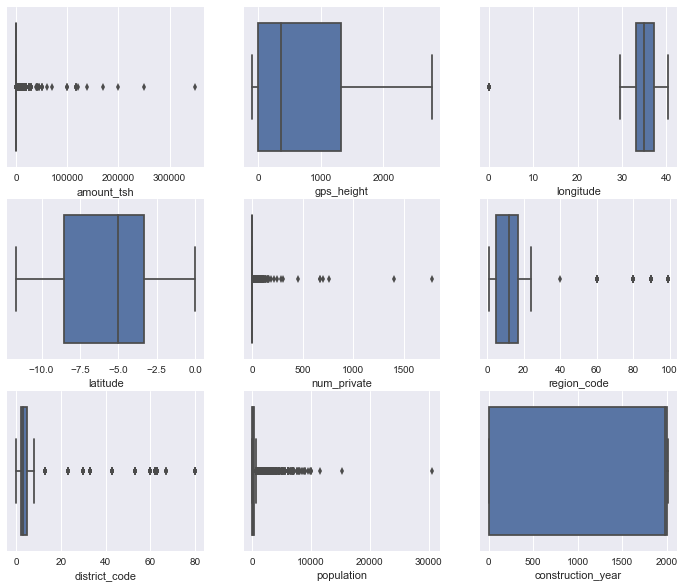

In [17]:
# box plot for int columns

f, axarr = plt.subplots(3, 3, figsize=(12, 10))
counter = 0

for x in range(3):
    for y in range(3):
        col_name = cols_ints[counter]
        counter += 1
        ax = axarr[x][y]
#         ax.set_title(col_name.lower(), fontsize=9)
        sns.boxplot(RAW_X[col_name], ax=ax)

# gps_height: As expected seems have some suddent spikes.
# logitude: We can see some dots at Zero. completely out of its box plot(outlier/wrong data)
# amount_tsh: As expected from percentiles shown in describe, there are high increase in 75% quartile
# construction_year: one value box plot

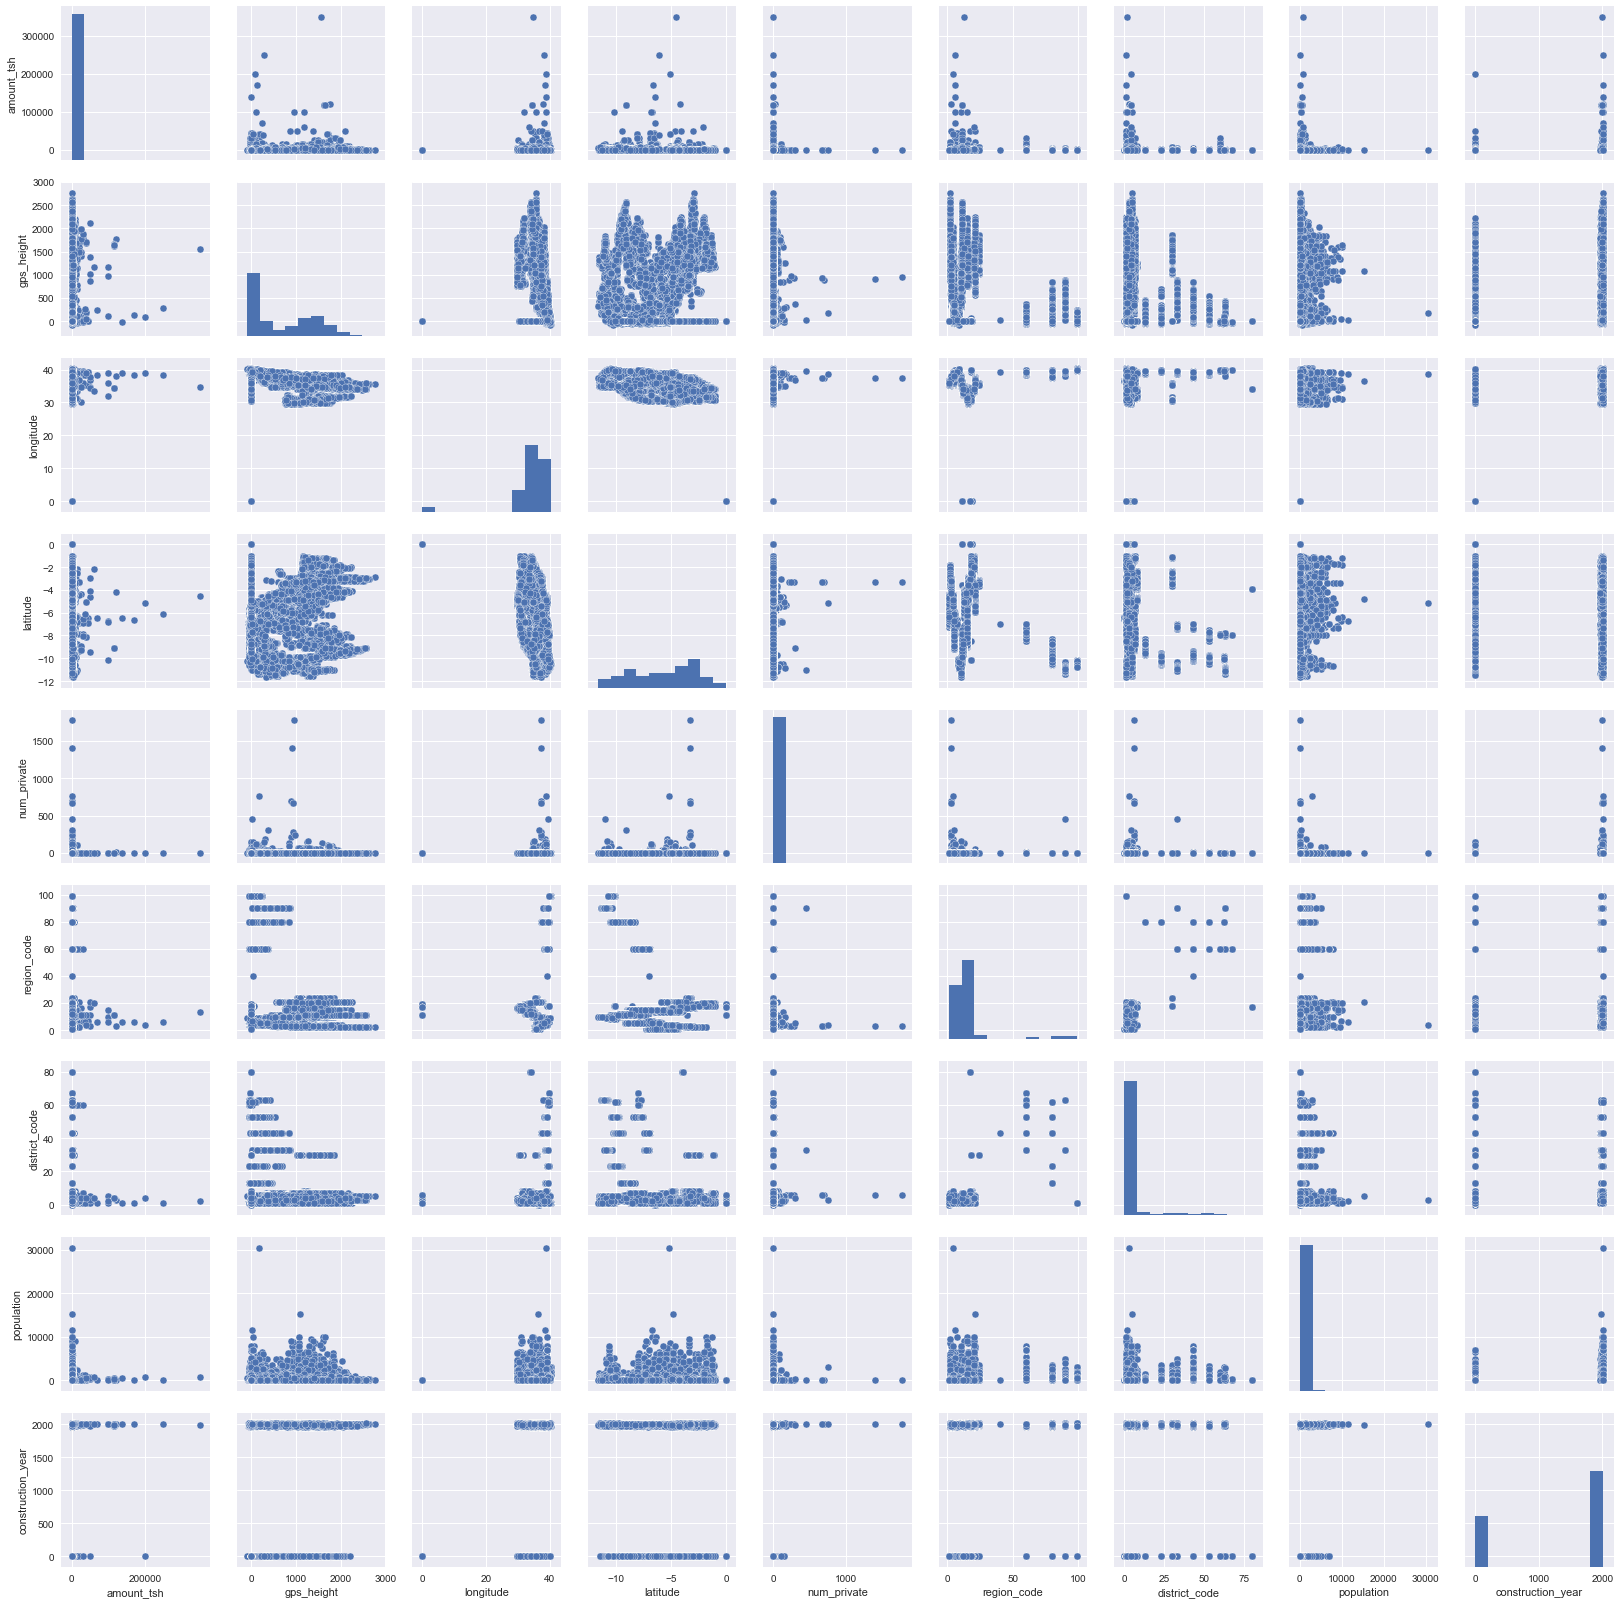

In [18]:
_ = sns.pairplot(RAW_X[cols_ints])

# logitude suffers from zero(wrong) value

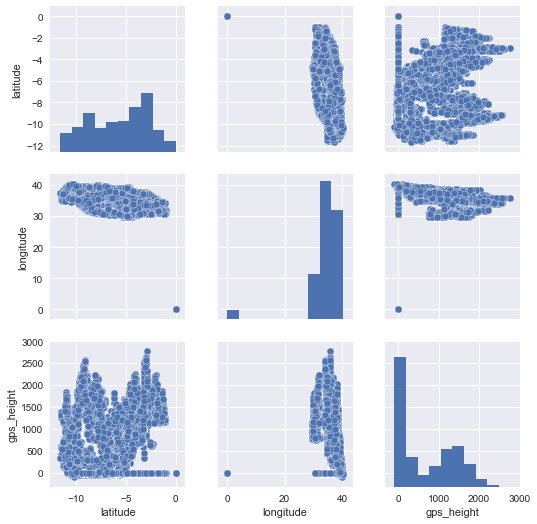

In [19]:
### gps_height
### longitude
### latitude
plt.figure(figsize=(12, 3))
g = sns.pairplot(RAW_X[['latitude', 'longitude', 'gps_height']])

__Note__:

    * `longitude, gps_height` seem to hold lots of zeros

## object

Here we are going to check what kind of data we have, relatively much entropy(variety) is there and other details.

In [20]:
RAW_X[cols_other].head().T

id,69572,8776,34310,67743,19728
basin,Lake Nyasa,Lake Victoria,Pangani,Ruvuma / Southern Coast,Lake Victoria
extraction_type,gravity,gravity,gravity,submersible,gravity
extraction_type_class,gravity,gravity,gravity,submersible,gravity
extraction_type_group,gravity,gravity,gravity,submersible,gravity
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A
installer,Roman,GRUMETI,World vision,UNICEF,Artisan
lga,Ludewa,Serengeti,Simanjiro,Nanyumbu,Karagwe
management,vwc,wug,vwc,vwc,other
management_group,user-group,user-group,user-group,user-group,other
payment,pay annually,never pay,pay per bucket,never pay,never pay


In [21]:
values_counts_bag = [len(RAW_X[column].value_counts()) for column in cols_other]

** Example of how np-log transforms data**

    >>> np.log([0.001, 0.01, 0.1, 1, 10, 100, 1000])

    array([-6.90775528, -4.60517019, -2.30258509,  0.        ,  2.30258509,
            4.60517019,  6.90775528])

As you can see in np-log example, we can learn that when a list of values vary significantly(exponentially) then their logarithms moves linearly. As we(I) feel comfortable in studying linear plot and linear information, we did a np.log to values counts.

In [22]:
cols_vc_dataframe = pd.DataFrame(np.log(values_counts_bag), index=cols_other, columns=['Value Counts'])

Values Counts: [9, 18, 7, 13, 1897, 2145, 125, 12, 5, 7, 7, 6, 5, 5, 1, 21, 12, 2696, 10, 3, 7, 19287, 2092, 8, 7, 6, 37400]

Log of Values Counts: [[  2.19722458   2.89037176   1.94591015   2.56494936   7.54802897
    7.67089483   4.82831374   2.48490665   1.60943791   1.94591015
    1.94591015   1.79175947   1.60943791   1.60943791   0.           3.04452244
    2.48490665   7.89952447   2.30258509   1.09861229   1.94591015
    9.86718657   7.64587583   2.07944154   1.94591015   1.79175947
   10.52942598]]


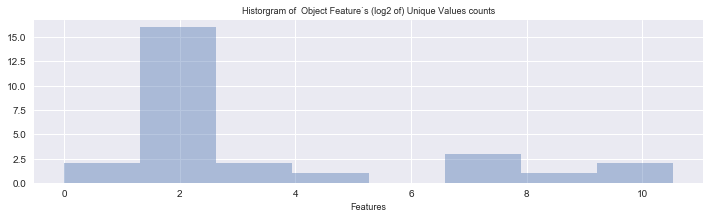

In [23]:
print('Values Counts:', values_counts_bag)

print('\nLog of Values Counts:', cols_vc_dataframe.T.values)

plt.figure(figsize=(12, 3))
_ = sns.distplot(cols_vc_dataframe.T.values, hist=True, kde=False)

_ = plt.title('Historgram of  Object Feature`s (log2 of) Unique Values counts', fontsize=9)
_ = plt.xlabel('Features', fontsize=9)

We seem to have some special categories where value counts are high.


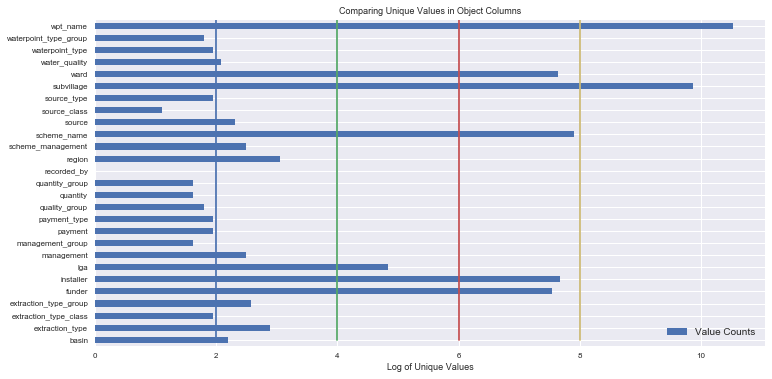

In [24]:
cols_vc_dataframe.plot(kind='barh', figsize=(12, 6), fontsize=8)
_ = plt.plot((2, 2), (0, 38))
_ = plt.plot((4, 4), (0, 38), '-g')
_ = plt.plot((6, 6), (0, 38), '-r')
_ = plt.plot((8, 8), (0, 38), '-y')
print('We seem to have some special categories where value counts are high.')

_ = plt.title('Comparing Unique Values in Object Columns', fontsize=9)
_ = plt.xlabel('Log of Unique Values', fontsize=9)

__Note:__: wpt_name, ward, subvillage, schema_name, installer, funder has lots of categorical values

Columns Value Counts Limit: 55 provided(or default)-input param
Columns Available for Plot: 20 provided(or default)-input param


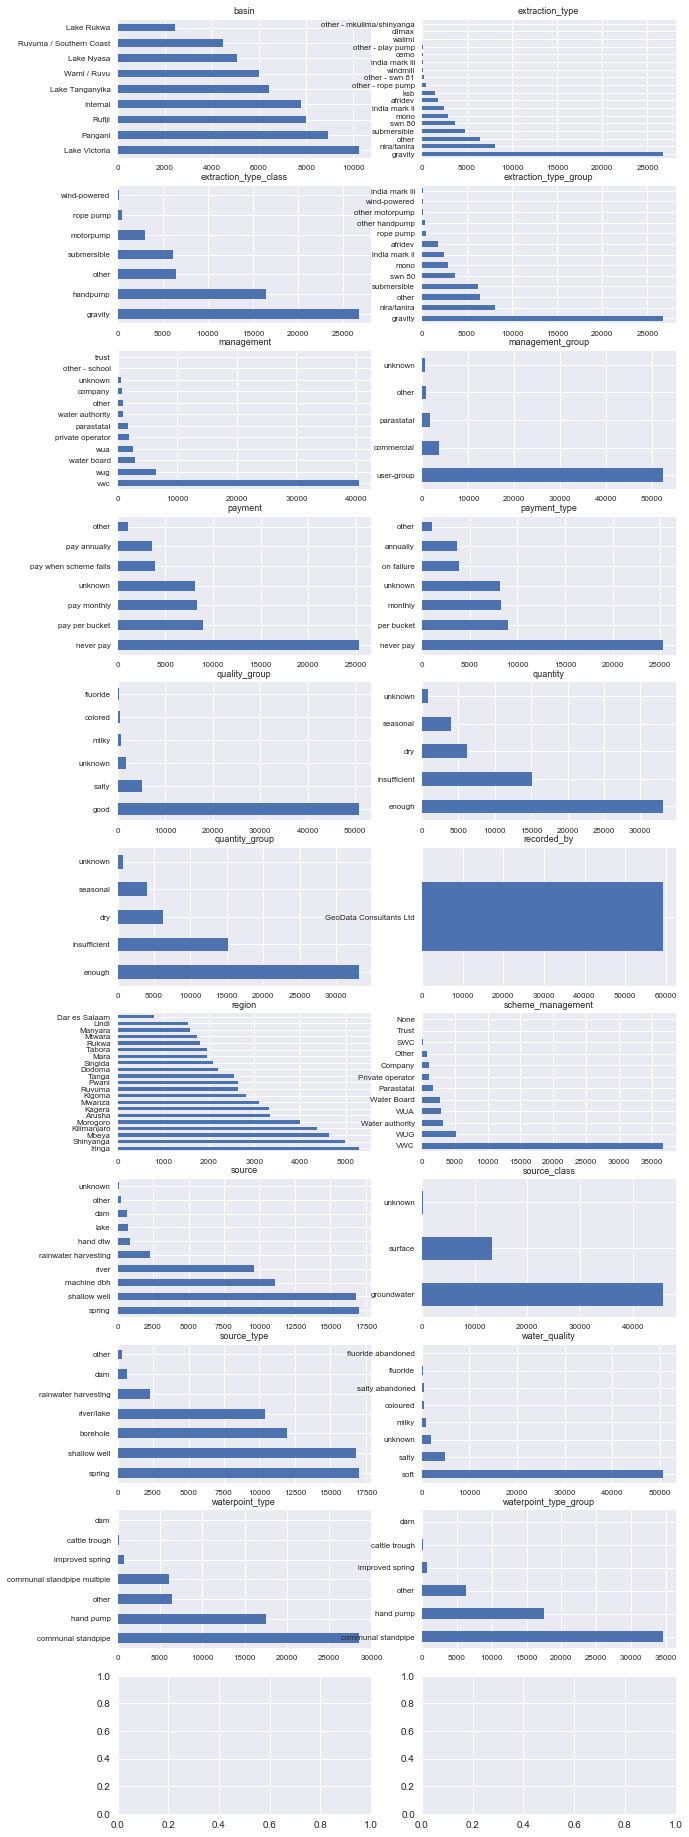

In [25]:
sam_dataframe_cols_value_count_analysis(RAW_X,
                                        cols_other,
                                        plot_col_vc_limit=55,
                                        x_plots_limit=11,
                                        y_plots_limit=2,
                                        show_percentages=False)

# we can observe strong similarities in the information

__Note__: In the above plot, we have two empty plot because of the generic function we created to show plots nicely. No other issues.

In [26]:
cols_vc_limit_fraction = 0.01
cols_vc_limit_value = RAW_X.shape[0] * cols_vc_limit_fraction
cols_vc_log_limit = np.log(cols_vc_limit_value)

print('Total Number of Records:', RAW_X.shape[0], '- Log val is:', np.log(RAW_X.shape[0]))
print('%s percent of Number of Records:' % (cols_vc_limit_fraction * 100),\
      cols_vc_limit_value,\
      ' - Log val is:',  cols_vc_log_limit)

Total Number of Records: 59400 - Log val is: 10.9920495054
1.0 percent of Number of Records: 594.0  - Log val is: 6.38687931936


Here in this project, `cols_other_check` refers to list of columns for which caution check is considered. Reason for this check is, we would need more data to explain other columns & target cols with respect to it.

Lets consider these columns with more 5% of values as non categorical values and since our problem statement is choosing which category, we will try to minimise the category and see how our performance changes(improves or not)

To begin we will consider that those categories with more than `cols_vc_limit_fraction` percentage as the upper limit allowed. Any column with other data will pruged to become some to other information

In [27]:
cols_other_check = []

for col, vc in cols_vc_dataframe.iterrows():
    if col in cols_other:
        if float(vc) > cols_vc_log_limit:
            cols_other_check.append(col)
#             print(col.upper())
#             print(str(vc).splitlines()[0])
#             print('---')

# print('Above shown are log transformed value counts')
print('Columns we need to moderate are:', cols_other_check)

Columns we need to moderate are: ['funder', 'installer', 'scheme_name', 'subvillage', 'ward', 'wpt_name']


As printed above, we will work on these columns to check if we can reduce the number of categories to a optimum count so that our models can learn patterns in better way.

## Special Checks

Based on intusion and some sign found from above plots, this section to try and understand more about few columns

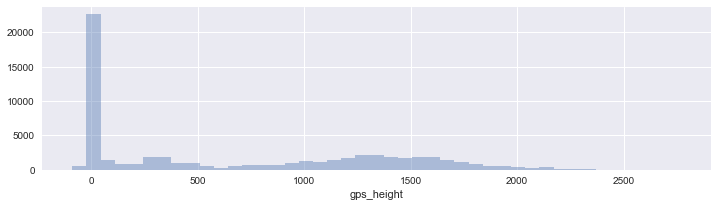

In [28]:
plt.figure(figsize=(12, 3))

_ = sns.distplot(RAW_X.gps_height, hist=True, kde=False, rug=False)

# lots of zeros

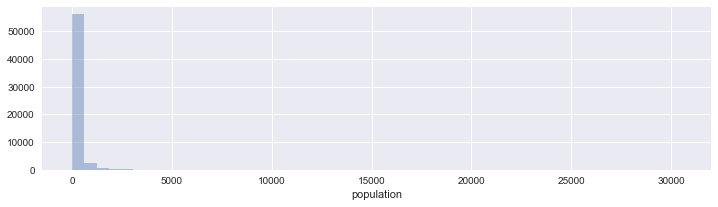

In [29]:
plt.figure(figsize=(12, 3))

_ = sns.distplot(RAW_X.population, hist=True, kde=False, rug=False)

# lots of zeros

__Checking logitude and latitude__

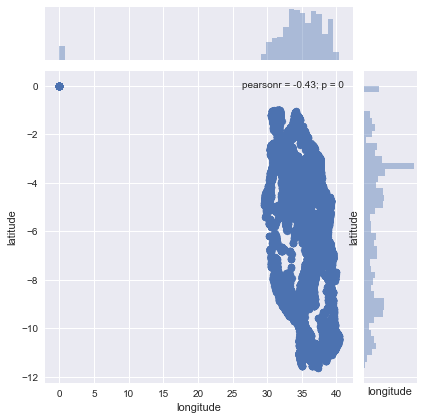

In [30]:
_ = sns.jointplot(x='longitude', y='latitude', data=RAW_X)
_ = plt.xlabel('longitude')
_ = plt.ylabel('latitude')

# longitude has zero issues

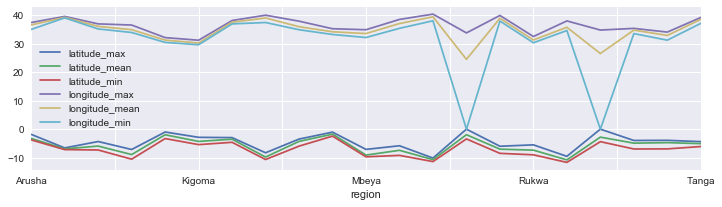

In [31]:
aa = RAW_X['longitude latitude region'.split()].copy()

bb = aa.groupby(by=['region']).mean()
bb.columns = ['longitude_mean', 'latitude_mean']
cc = aa.groupby(by=['region']).min()
cc.columns = ['longitude_min', 'latitude_min']
dd = aa.groupby(by=['region']).max()
dd.columns = ['longitude_max', 'latitude_max']

abcd = bb.join(cc).join(dd)[['latitude_max',
 'latitude_mean',
 'latitude_min',
 'longitude_max',
 'longitude_mean',
 'longitude_min']].copy()


_ = abcd.plot(figsize=(12, 3))

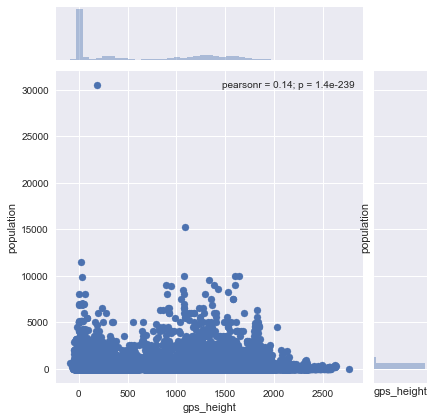

In [32]:
_ = sns.jointplot(x='gps_height', y='population', data=RAW_X)
_ = plt.xlabel('gps_height')
_ = plt.ylabel('population')

__Columns with Simmilar information__

In [33]:
print('Extraction Type:\n', RAW_X.extraction_type.unique().tolist())
print('\n')
print('Extraction Type Class:\n', RAW_X.extraction_type_class.unique().tolist())
print('\n')
print('Extraction Type Group:\n', RAW_X.extraction_type_group.unique().tolist())

Extraction Type:
 ['gravity', 'submersible', 'swn 80', 'nira/tanira', 'india mark ii', 'other', 'ksb', 'mono', 'windmill', 'afridev', 'other - rope pump', 'india mark iii', 'other - swn 81', 'other - play pump', 'cemo', 'climax', 'walimi', 'other - mkulima/shinyanga']


Extraction Type Class:
 ['gravity', 'submersible', 'handpump', 'other', 'motorpump', 'wind-powered', 'rope pump']


Extraction Type Group:
 ['gravity', 'submersible', 'swn 80', 'nira/tanira', 'india mark ii', 'other', 'mono', 'wind-powered', 'afridev', 'rope pump', 'india mark iii', 'other handpump', 'other motorpump']


In [34]:
print('Management:\n', RAW_X.management.unique().tolist())
print('\n')
print('Management Group:\n', RAW_X.management_group.unique().tolist())

Management:
 ['vwc', 'wug', 'other', 'private operator', 'water board', 'wua', 'company', 'water authority', 'parastatal', 'unknown', 'other - school', 'trust']


Management Group:
 ['user-group', 'other', 'commercial', 'parastatal', 'unknown']


In [35]:
RAW_X[RAW_X.longitude < 5]['region'].unique().tolist()

['Shinyanga', 'Mwanza']

In [36]:
RAW_X[RAW_X.latitude < 5]['region'].unique().tolist()

['Iringa',
 'Mara',
 'Manyara',
 'Mtwara',
 'Kagera',
 'Tanga',
 'Shinyanga',
 'Tabora',
 'Pwani',
 'Ruvuma',
 'Kilimanjaro',
 'Rukwa',
 'Mwanza',
 'Kigoma',
 'Lindi',
 'Dodoma',
 'Arusha',
 'Mbeya',
 'Singida',
 'Morogoro',
 'Dar es Salaam']

If we the Geographical Map of Aftica, we can clearly see that these values are not correct.

In [37]:
df = pd.DataFrame.join(RAW_X, RAW_y)

# this is to count
df['sam'] = 1

df.pivot_table(df, index=['status_group'], columns=['basin'],  aggfunc='count')['sam'].T

status_group,functional,functional needs repair,non functional
basin,,,
Internal,4482,557,2746
Lake Nyasa,3324,250,1511
Lake Rukwa,1000,270,1184
Lake Tanganyika,3107,742,2583
Lake Victoria,5100,989,4159
Pangani,5372,477,3091
Rufiji,5068,437,2471
Ruvuma / Southern Coast,1670,326,2497
Wami / Ruvu,3136,269,2582


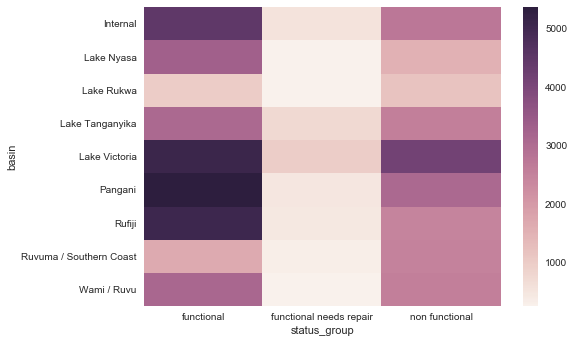

In [38]:
_ = sns.heatmap(df.pivot_table(df, index=['status_group'], columns=['basin'],  aggfunc='count')['sam'].T)

In [39]:
df.pivot_table(df, index=['status_group'], columns=['region'],  aggfunc='count')['sam'].T

status_group,functional,functional needs repair,non functional
region,,,
Arusha,2294,175,881
Dar es Salaam,461,3,341
Dodoma,1009,209,983
Iringa,4141,123,1030
Kagera,1727,304,1285
Kigoma,1363,603,850
Kilimanjaro,2640,322,1417
Lindi,460,93,993
Manyara,987,96,500


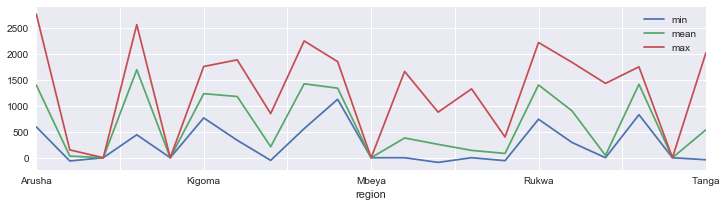

In [40]:
aa = RAW_X[['region', 'gps_height']].groupby(['region']).min()
aa.columns = ['min']
bb = RAW_X[['region', 'gps_height']].groupby(['region']).mean()
bb.columns = ['mean']
cc = RAW_X[['region', 'gps_height']].groupby(['region']).max()
cc.columns = ['max']

_ = aa.join(bb).join(cc).plot(figsize=(12, 3))

In [41]:
aa
# 11456.7 Dodoma

,min
region,
Arusha,594
Dar es Salaam,-63
Dodoma,0
Iringa,443
Kagera,0
Kigoma,768
Kilimanjaro,337
Lindi,-51
Manyara,561


# observations


 * scheme_name has too many null values.
 * longitude has zeros which is not possible.
 * public_meetings, permit, amount_tsh, gps_height, population, constructrion_year columns required interfilling of data has lots of outliers(as zeros)
 * wpt_name, ward, subvillage, schema_name, installer, funder has lots of categorical values

Few columns which seems to hold simmilar kind of information

 * extraction_type, extraction_type_group, extraction_type_class
 * management, management_group
 * scheme_management, scheme_name
 * payment, payment_type
 * water_quality, quality_group
 * source, source_type, source_class
 * waterpoint_type, waterpoint_type_group
 
 
 
__Geo Location information:__ All following parameter are availble for same reason, to find the address.

 * longitude, latitude
 * region
 * district_code within region
 * ward
 * subvillage

Compared to all other geo columns `regions` columns has complete data.


In [42]:
# clean up for removing any imports other defined function & variables

for each in dir():
    if each not in crazy_list:
        del each

In [43]:
X, y, TEST_X = sam_pickle_load(prefix="tmp/Iteration2_final_")

LOAD PREFIX USED:  tmp/Iteration2_final_


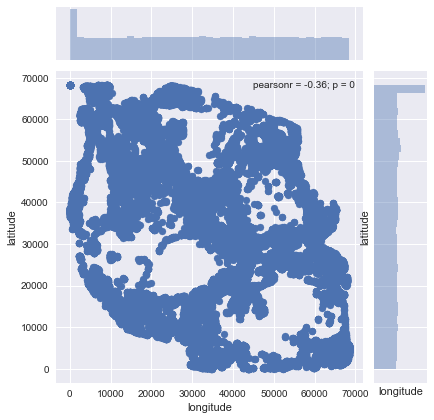

In [44]:

_ = sns.jointplot(x='longitude', y='latitude', data=X)
_ = plt.xlabel('longitude')
_ = plt.ylabel('latitude')

# longitude has zero issues